# Monte Carlo Simulation for FE
## IEOR 4703

### Conjugate prior for the normal distribution

Both for $\mu$ and $\sigma^2$.

3 cases:
* Case 1: $\mu$ is unknown, $\sigma^2$ is known
* Case 2: $\mu$ is known, $\sigma^2$ is unknown
* Case 3: both $\mu$ and  $\sigma^2$ are unknown

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm, gamma, t

## Case 1

In [6]:
class case1(object):
    def __init__(self, ax, mu=0, sig=1):
        # true parameters
        self.mu = mu
        self.sig = sig      
        # set up plot parameters
        self.x = np.linspace(-10, 10, 200)
        self.line, = ax.plot([], [], 'g-')
        self.ax = ax
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(0, 2)
        self.ax.grid(True)
        self.ax.set_xlabel('$\mu$')
        self.ax.set_ylabel('$p(\mu \mid x)$')
        self.ax.set_title('$Case1: \mu$ is unknown, $\sigma^2$ is known')
        # this vertical line represents the theoretical value, to
        # which the plotted distribution should converge
        self.ax.axvline(self.mu, linestyle='--', color='red')
        
    def init(self):
        # hyperparameters (initial guess)
        self.mu0 = -10.
        self.sig0 = 0.25
        # line
        self.line.set_data(self.x, norm.pdf(self.x, self.mu0, self.sig0))
        return self.line,

    def __call__(self, i):
        if i == 0:
            return self.init()
        # simulate a normal rv and update the hyperparameters
        z = self.mu + self.sig * np.random.randn()
        # posterior
        eta = (self.sig**2*self.mu0 + z*self.sig0**2)/(self.sig**2 + self.sig0**2)
        kappa = np.sqrt((self.sig**2 * self.sig0**2)/(self.sig**2 + self.sig0**2))
        y = norm.pdf(self.x, eta, kappa)
        # update prior by using posterior as a prior
        self.mu0 = eta
        self.sig0 = kappa
        self.line.set_data(self.x, y)
        return self.line,

Traceback (most recent call last):
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


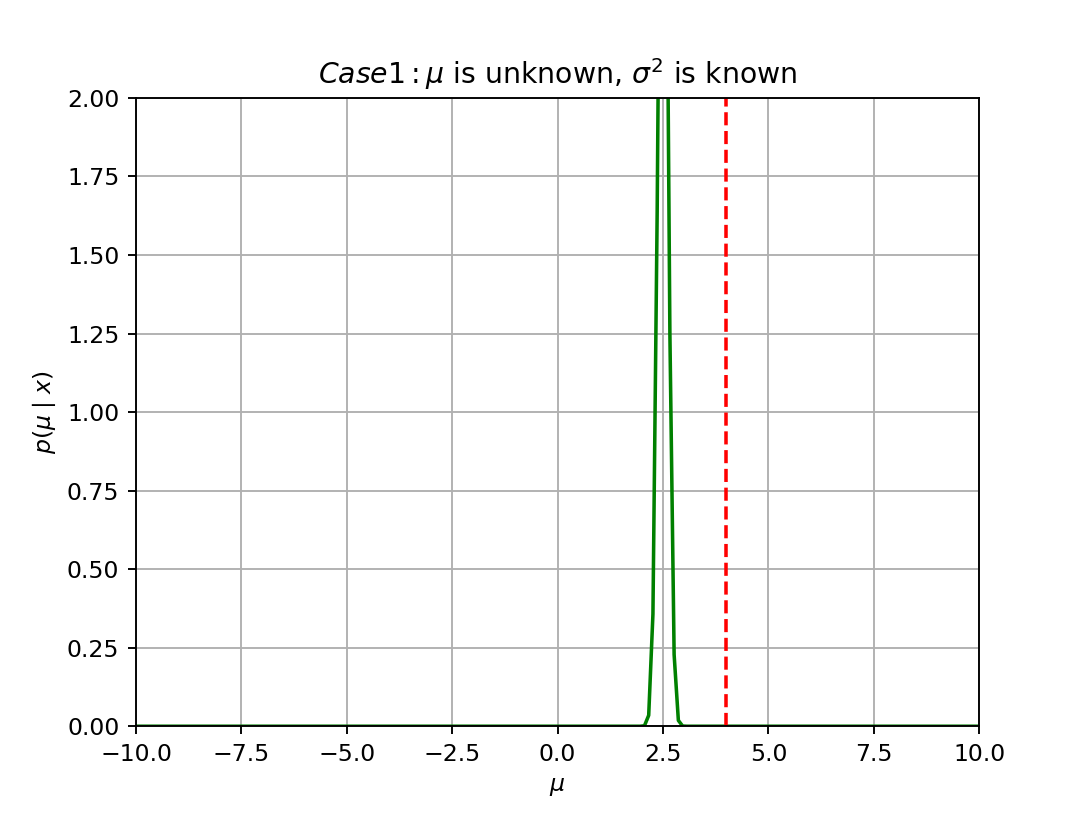

In [13]:
num_obs = 400
# true params
mu = 4.
sig = 2.5

# run simulation
# cannot use inline mode
%matplotlib notebook 
cycle_anim = False # the animation only runs once
fig, ax = plt.subplots()
ud = case1(ax, mu=mu, sig=sig)
anim = FuncAnimation(fig, ud, frames=np.arange(num_obs), init_func=ud.init, interval=25, blit=True, repeat=cycle_anim)

## Case 2

In [8]:
class case2(object):
    def __init__(self, ax, mu=0, sig=1):
        # true parameters
        self.mu = mu
        self.sig = sig      
        # set up plot parameters
        self.x = np.linspace(0.002, 0.5, 200)
        self.line, = ax.plot([], [], 'g-')
        self.ax = ax
        self.ax.set_xlim(0, 0.5)
        self.ax.set_ylim(0, 20)
        self.ax.grid(True)
        self.ax.set_xlabel('$1/\sigma^2$')
        self.ax.set_ylabel('$p(1/\sigma^2 \mid x)$')
        self.ax.set_title('$Case2: \mu$ is known, $\sigma^2$ is unknown')
        # this vertical line represents the theoretical value, to
        # which the plotted distribution should converge
        self.ax.axvline(1./self.sig**2, linestyle='--', color='red')
        
    def init(self):
        # hyperparameters (initial guess)
        self.a0 = 0.1
        self.b0 = 0.1
        # line
        self.line.set_data(self.x, gamma.pdf(self.x, self.a0, scale=1./self.b0))
        return self.line,

    def __call__(self, i):
        if i == 0:
            return self.init()
        # simulate a normal rv and update the hyperparameters
        z = self.mu + self.sig * np.random.randn()
        # posterior
        a_new = self.a0 + 0.5
        b_new = self.b0 + (z - self.mu)**2 / 2
        y = gamma.pdf(self.x, a_new, scale=1./b_new)
        # update prior by using posterior as a prior
        self.a0 = a_new
        self.b0 = b_new
        self.line.set_data(self.x, y)
        return self.line,

Traceback (most recent call last):
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


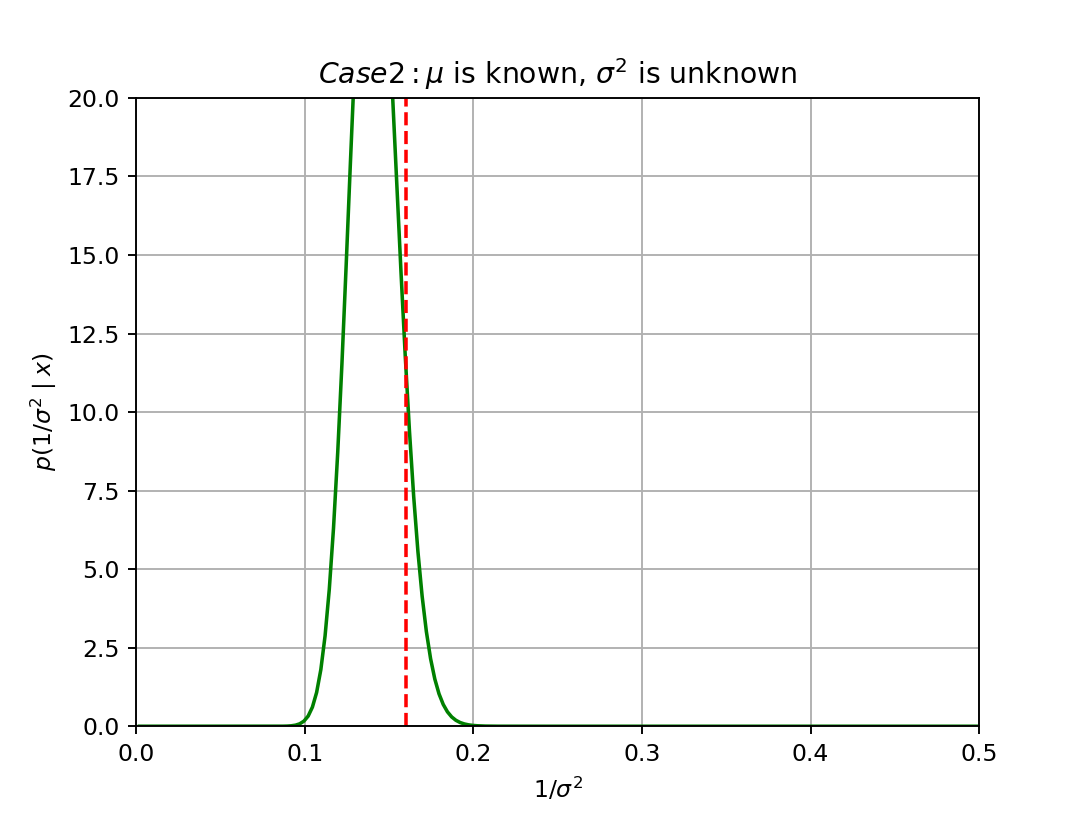

In [9]:
num_obs = 300
# true params
mu = 4.
sig = 2.5

# run simulation
# cannot use inline mode
%matplotlib notebook 
cycle_anim = False # the animation only runs once
fig, ax = plt.subplots()
ud = case2(ax, mu=mu, sig=sig)
anim = FuncAnimation(fig, ud, frames=np.arange(num_obs), init_func=ud.init, interval=25, blit=True, repeat=cycle_anim)

## Case 3

In [10]:
class case3(object):
    def __init__(self, ax1, ax2, mu=0, sig=1):
        # true parameters
        self.mu = mu
        self.sig = sig      
        # set up plot parameters for mu
        self.x1 = np.linspace(-10, 10, 200)
        self.ax1 = ax1
        self.ax1.set_xlim(-10, 10)
        self.ax1.set_ylim(0, 2)
        self.ax1.grid(True)
        self.ax1.set_xlabel('$\mu$')
        self.ax1.set_ylabel('$p(\mu \mid x)$')
        self.ax1.set_title('Case3: $\mu$ and $\sigma^2$ are unknown')
        self.ax1.axvline(self.mu, linestyle='--', color='red')
        # set up plot parameters for sigma^2
        self.x2 = np.linspace(0.002, 0.5, 200)
        self.ax2 = ax2
        self.ax2.set_xlim(0, 0.5)
        self.ax2.set_ylim(0, 20)
        self.ax2.grid(True)
        self.ax2.set_xlabel('$1/\sigma^2$')
        self.ax2.set_ylabel('$p(1/\sigma^2 \mid x)$')
        self.ax2.axvline(1./self.sig**2, linestyle='--', color='red')
        # lines
        self.line1, = ax1.plot([], [], 'g-')
        self.line2, = ax2.plot([], [], 'g-')
        
    def init(self):
        # hyperparameters (initial guess)
        self.a0 = 0.2
        self.b0 = 0.5
        self.mu0 = 0.5
        self.k0 = 1. # precision k=1/sigma**2
        # line
        t1 = (self.x1 - self.mu0)/np.sqrt(self.b0/(self.a0*self.k0)) # marginal is t
        self.line1.set_data(self.x1, t.pdf(t1, df=2*self.a0)/np.sqrt(self.b0/(self.a0*self.k0)))
        self.line2.set_data(self.x2, gamma.pdf(self.x2, self.a0, scale=1./self.b0))
        return 0

    def __call__(self, i):
        if i == 0:
            return self.init()
        # simulate a normal rv and update the hyperparameters
        z = self.mu + self.sig * np.random.randn()
        # posterior
        mu_new = (self.k0*self.mu0 + z)/(self.k0 + 1)
        k_new = self.k0 + 1
        a_new = self.a0 + 0.5
        b_new = self.b0 + (self.k0/(self.k0 + 1))*(z - self.mu0)**2/2
        # marginal for mu is t
        t1 = (self.x1 - mu_new)/np.sqrt(b_new/(a_new*k_new))
        y1 = t.pdf(t1, df=2*a_new)/np.sqrt(b_new/(a_new*k_new))
        y2 = gamma.pdf(self.x2, a_new, scale=1./b_new)
        # update prior by using posterior as a prior
        self.mu0 = mu_new
        self.k0 = k_new
        self.a0 = a_new
        self.b0 = b_new
        self.line1.set_data(self.x1, y1)
        self.line2.set_data(self.x2, y2)
        return 0

<IPython.core.display.Javascript object>


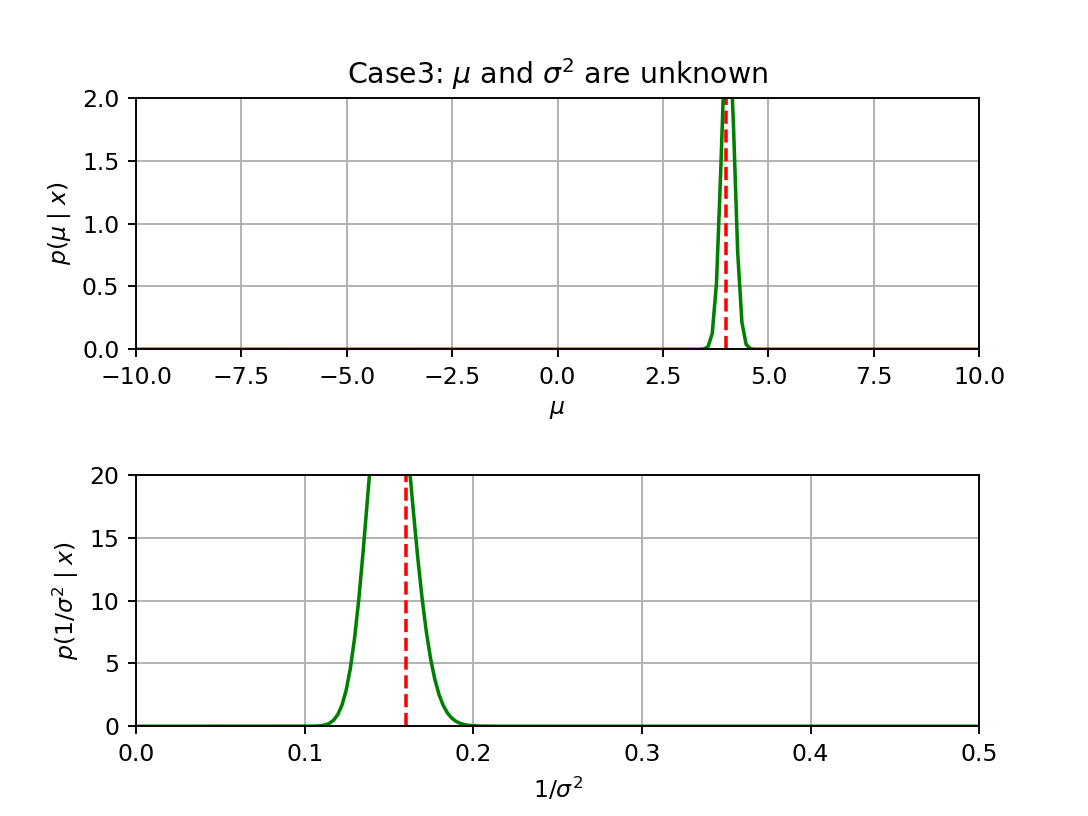

In [12]:
num_obs = 300
# true params
mu = 4.
sig = 2.5

# run simulation
# cannot use inline mode
%matplotlib notebook 
cycle_anim = False # the animation only runs once
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
ud = case3(ax1, ax2, mu=mu, sig=sig)
anim = FuncAnimation(fig, ud, frames=np.arange(num_obs), init_func=ud.init, interval=25, blit=True, repeat=cycle_anim)